In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, matthews_corrcoef

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
EC=pd.read_csv('/content/drive/MyDrive/MScProject/online_shoppers_intention.csv')
EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
variable=['Weekend','Revenue']
for col in variable:
    encoder = LabelEncoder()
    encoder.fit(EC[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    EC[col] = encoder.fit_transform(EC[col])


Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [6]:
EC['Month'] = EC['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [7]:
MMC = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
EC[MMC] = scaler.fit_transform(EC[MMC])

In [9]:
label_encoder = LabelEncoder()

EC['VisitorType'] = label_encoder.fit_transform(EC['VisitorType'])

EC.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,2,1,0


In [10]:
X = EC.drop('Revenue', axis=1)
y = EC['Revenue']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Make predictions on the testing set
y_pred_probar = rf_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probar)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.54      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

AUC Score: 0.9182996785479604
MCC Score: 0.5731161589864427


In [12]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Make predictions on the testing set
y_pred_probag = gb_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probag)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.72      0.57      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.76      0.79      2466
weighted avg       0.88      0.89      0.89      2466

AUC Score: 0.9287755814848362
MCC Score: 0.577831863171176


In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model on the training dataset
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = xgb_classifier.predict(X_test)


print(classification_report(y_test, y_pred))
# Make predictions on the testing set
y_pred_probax = xgb_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probax)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.71      0.59      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466

AUC Score: 0.9200466490252841
MCC Score: 0.5836767580388676


In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the model on the training dataset
lgb_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



print(classification_report(y_test, y_pred))
# Make predictions on the testing set
y_pred_probal = lgb_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probal)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)

[LightGBM] [Info] Number of positive: 1497, number of negative: 8367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151764 -> initscore=-1.720832
[LightGBM] [Info] Start training from score -1.720832
Accuracy: 0.8913219789132197
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.72      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.88      0.89      0.89      2466

AUC Score: 0.9248554057814007
MCC Score: 0.5803992089549403


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training dataset
dt_classifier.fit(X_train, y_train)


# Make predictions on the test dataset
y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
# Make predictions on the testing set
y_pred_probad = dt_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probad)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2055
           1       0.56      0.57      0.57       411

    accuracy                           0.85      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.85      0.85      2466

AUC Score: 0.7411192214111921
MCC Score: 0.478544930106141


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Train the model on the training dataset
knn_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = knn_classifier.predict(X_test)




print(classification_report(y_test, y_pred))
# Make predictions on the testing set
y_pred_probak = knn_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probak)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2055
           1       0.29      0.09      0.13       411

    accuracy                           0.81      2466
   macro avg       0.57      0.52      0.51      2466
weighted avg       0.75      0.81      0.77      2466

AUC Score: 0.6217640198672753
MCC Score: 0.07700631910619589


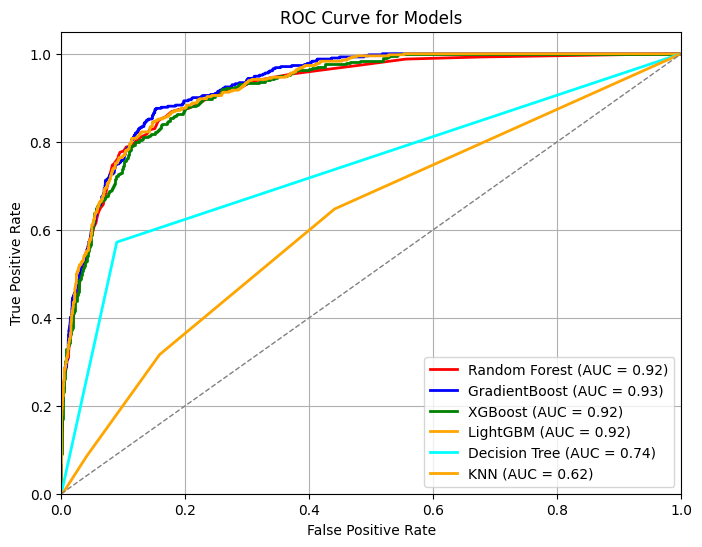

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_probar)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_probag)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_probax)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_probal)
fpr_d, tpr_d, _ = roc_curve(y_test, y_pred_probad)
fpr_k, tpr_k, _ = roc_curve(y_test, y_pred_probak)

# Calculate AUC for each model
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_d = auc(fpr_d, tpr_d)
roc_auc_k= auc(fpr_k, tpr_k)

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='GradientBoost (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_gb)
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_d, tpr_d, color='cyan', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_d)
plt.plot(fpr_k, tpr_k, color='orange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_k)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


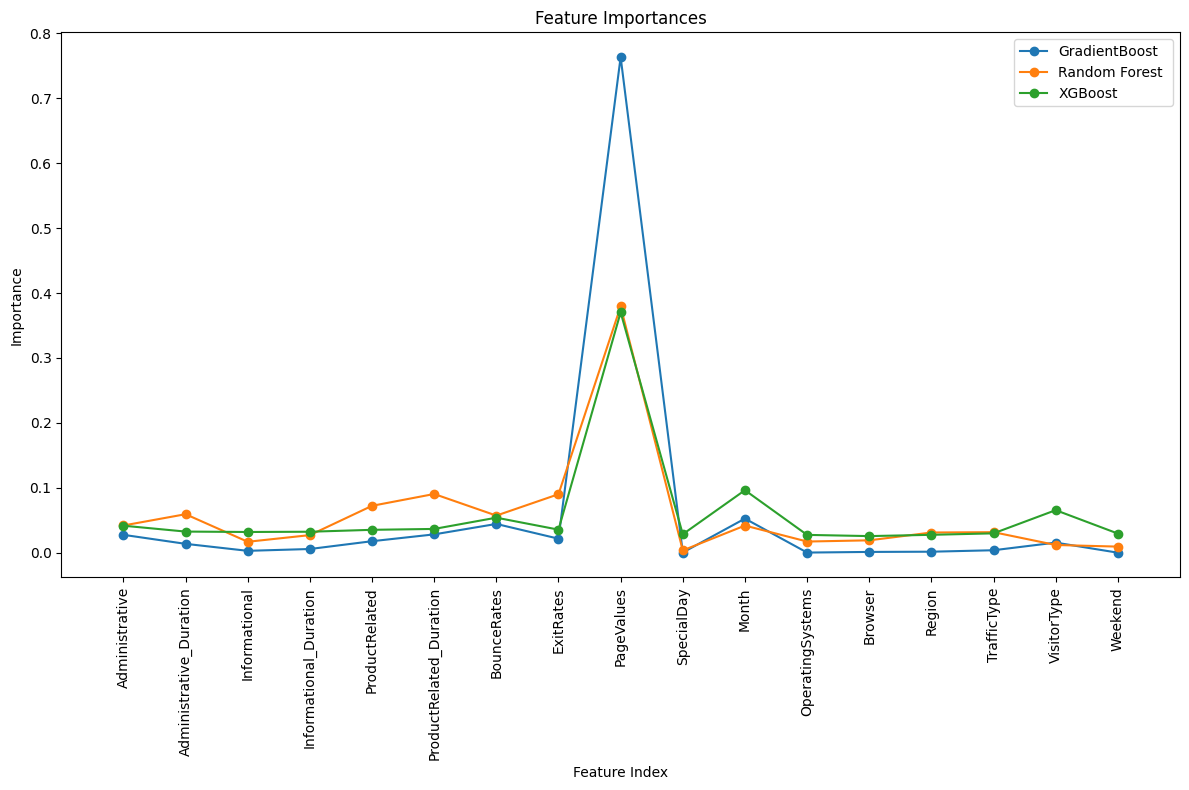

In [ ]:
import matplotlib.pyplot as plt

feature_names = X_train.columns

plt.figure(figsize=(12, 8))


indices_gb = range(len(gb_classifier.feature_importances_))
plt.plot(range(X_train.shape[1]), gb_classifier.feature_importances_[indices_gb], marker='o', linestyle='-', label='GradientBoost')


indices_rf = range(len(rf_classifier.feature_importances_))
plt.plot(range(X_train.shape[1]),rf_classifier.feature_importances_[indices_rf], marker='o', linestyle='-', label='Random Forest ')

indices_xgb = range(len(xgb_classifier.feature_importances_))
plt.plot(range(X_train.shape[1]),xgb_classifier.feature_importances_[indices_xgb], marker='o', linestyle='-', label='XGBoost')



plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.xticks(range(X_train.shape[1]), feature_names[indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
gb_classifier.fit(X_trainn, y_trainn)
y_pred = gb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))

# Make predictions on the testing set
y_pred_proba = gb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2062
           1       0.91      0.93      0.92      2107

    accuracy                           0.92      4169
   macro avg       0.92      0.92      0.92      4169
weighted avg       0.92      0.92      0.92      4169

AUC Score: 0.9726545435127562
MCC Score: 0.8327594844280783


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test dataset (X_test)
y_pred = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
# Make predictions on the testing set
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC Score:", mcc)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 0.9067317508473931
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2055
           1       0.72      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466

AUC Score: 0.9283469787652217
MCC Score: 0.5816745226115397


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_trainn, y_trainn)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset (X_train and y_train combined)
gb_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test dataset (X_test)
y_pred = gb_classifier.predict(X_testt)
print(classification_report(y_testt, y_pred))
# Make predictions on the testing set
y_pred_proba = gb_classifier.predict_proba(X_testt)[:, 1]  # Predict probabilities for class 1

# Calculate AUC score
auc = roc_auc_score(y_testt, y_pred_proba)
print("AUC Score:", auc)

# Calculate MCC score
mcc = matthews_corrcoef(y_testt, y_pred)
print("MCC Score:", mcc)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy Score: 0.9326536731634182
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2062
           1       0.93      0.95      0.94      2107

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169

AUC Score: 0.9833491152534367
MCC Score: 0.8817875601452532


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}